# 상위 코인 상관관계를 분석해 보자

In [111]:
import pandas as pd

In [112]:
df_btc = pd.read_csv('../upbit/data/bitcoin.csv', encoding= 'utf-8')
df_ada = pd.read_csv('../upbit/data/1_에이다.csv', encoding= 'utf-8')
df_zil = pd.read_csv('../upbit/data/2_질리카.csv', encoding= 'utf-8')
df_atom = pd.read_csv('../upbit/data/3_코스모스.csv', encoding= 'utf-8')

In [113]:
df_btc['btc_change'] = (df_btc['close']-df_btc['close'].shift(1))/df_btc['close']*100
df_ada['ada_change'] = (df_ada['close']-df_ada['close'].shift(1))/df_ada['close']*100
df_zil['zil_change'] = (df_zil['close']-df_zil['close'].shift(1))/df_zil['close']*100
df_atom['atom_change'] = (df_atom['close']-df_atom['close'].shift(1))/df_atom['close']*100


In [114]:
#2019-05-03

df_btc = df_btc[(df_btc['date'] >= '2019-05-04')]
df_ada = df_ada[(df_ada['date'] >= '2019-05-04')]
df_zil = df_zil[(df_zil['date'] >= '2019-05-04')]
df_atom = df_atom[(df_atom['date'] >= '2019-05-04')]
df_btc

,date,open,high,low,close,volume,value,btc_change
586,2019-05-04,6596000.0,6759000.0,6452000.0,6719000.0,6998.190268,4.644523e+10,1.830630
587,2019-05-05,6718000.0,6731000.0,6607000.0,6704000.0,3199.977364,2.136103e+10,-0.223747
588,2019-05-06,6703000.0,6712000.0,6573000.0,6620000.0,3956.960234,2.622065e+10,-1.268882
589,2019-05-07,6620000.0,6930000.0,6618000.0,6753000.0,7375.750472,5.024158e+10,1.969495
590,2019-05-08,6752000.0,6959000.0,6670000.0,6959000.0,5646.193204,3.856273e+10,2.960195
...,...,...,...,...,...,...,...,...
1343,2021-05-30,42688000.0,43827000.0,40580000.0,43177000.0,9194.807917,3.903808e+11,1.132547
1344,2021-05-31,43177000.0,44235000.0,41304000.0,43761000.0,10111.066220,4.336194e+11,1.334522
1345,2021-06-01,43761000.0,44550000.0,42515000.0,43200000.0,9081.150288,3.948303e+11,-1.298611
1346,2021-06-02,43207000.0,44341000.0,42550000.0,43732000.0,7405.760642,3.217178e+11,1.216501


In [115]:
df_btc.reset_index(drop= True, inplace=True)
df_ada.reset_index(drop= True, inplace=True)
df_zil.reset_index(drop= True, inplace=True)
df_atom.reset_index(drop= True, inplace=True)

In [116]:
from functools import reduce
import pandas as pd

df_concat = pd.concat([df_btc['btc_change'],df_ada['ada_change'],
                       df_zil['zil_change'],df_atom['atom_change']], axis =1)
df_concat

,btc_change,ada_change,zil_change,atom_change
0,1.830630,-3.761349,-5.405405,-0.821693
1,-0.223747,-0.521512,-1.092896,-7.794508
2,-1.268882,0.518807,3.174603,-2.636364
3,1.969495,-3.908356,-4.419890,-3.773585
4,2.960195,1.329787,3.208556,-4.433498
...,...,...,...,...
757,1.132547,9.162304,0.781250,2.226588
758,1.334522,5.911330,5.882353,6.605505
759,-1.298611,0.490196,2.158273,-0.863664
760,1.216501,1.449275,3.472222,0.429975


In [117]:
correlation_martrix = df_concat.corr(method = 'pearson')
correlation_martrix

,btc_change,ada_change,zil_change,atom_change
btc_change,1.000000,0.643009,0.550025,0.555141
ada_change,0.643009,1.000000,0.602810,0.653299
zil_change,0.550025,0.602810,1.000000,0.584667
atom_change,0.555141,0.653299,0.584667,1.000000


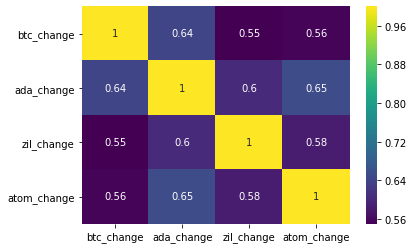

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_martrix, 
            annot=True,
           cmap='viridis')
plt.show()

# 유의미한 그래프를 그려보자

In [16]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "C:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknow system... sorry~')
    
plt.rcParams['axes.unicode_minus'] = False



from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [33]:
btc = pd.read_csv('../upbit/data/bitcoin.csv', encoding='utf-8')
ada = pd.read_csv('../upbit/data/1_에이다.csv', encoding= 'utf-8')
zil = pd.read_csv('../upbit/data/2_질리카.csv', encoding= 'utf-8')
atom = pd.read_csv('../upbit/data/3_코스모스.csv', encoding= 'utf-8')

btc.head(3)

,date,open,high,low,close,volume,value
0,2017-09-25,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08
1,2017-09-26,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07
2,2017-09-27,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08


In [34]:
btc = btc[(btc['date'] >= '2019-05-04')]
ada = ada[(ada['date'] >= '2019-05-04')]
zil = zil[(zil['date'] >= '2019-05-04')]
atom = atom[(atom['date'] >= '2019-05-04')]

btc.reset_index(drop= True, inplace=True)
ada.reset_index(drop= True, inplace=True)
zil.reset_index(drop= True, inplace=True)
atom.reset_index(drop= True, inplace=True)
btc

,date,open,high,low,close,volume,value
0,2019-05-04,6596000.0,6759000.0,6452000.0,6719000.0,6998.190268,4.644523e+10
1,2019-05-05,6718000.0,6731000.0,6607000.0,6704000.0,3199.977364,2.136103e+10
2,2019-05-06,6703000.0,6712000.0,6573000.0,6620000.0,3956.960234,2.622065e+10
3,2019-05-07,6620000.0,6930000.0,6618000.0,6753000.0,7375.750472,5.024158e+10
4,2019-05-08,6752000.0,6959000.0,6670000.0,6959000.0,5646.193204,3.856273e+10
...,...,...,...,...,...,...,...
757,2021-05-30,42688000.0,43827000.0,40580000.0,43177000.0,9194.807917,3.903808e+11
758,2021-05-31,43177000.0,44235000.0,41304000.0,43761000.0,10111.066220,4.336194e+11
759,2021-06-01,43761000.0,44550000.0,42515000.0,43200000.0,9081.150288,3.948303e+11
760,2021-06-02,43207000.0,44341000.0,42550000.0,43732000.0,7405.760642,3.217178e+11


In [35]:
import pandas as pd
df = pd.concat([btc['date'],btc['close'].rename('btc'), ada['close'].rename('ada'),
                zil['close'].rename('zil'),atom['close'].rename('atom')], axis =1)

df.set_index('date', inplace = True)
df = df.drop(index=['2021-06-03'], axis=0)

### 비트코인이 오르면 진짜 알트도 같이 오를까? 라는 그래프
* 스케일을 맞춰 그래프가 비슷한지 맞춰보기 위한 의도

In [36]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(df)

In [37]:
df_scale = pd.DataFrame(scaled, columns= df.columns)
df_scale = df_scale.set_index(pd.DatetimeIndex(df.index))

df_scale

,btc,ada,zil,atom
date,,,,
2019-05-04,0.478668,1.637089,4.658264,11.739516
2019-05-05,0.458500,1.622976,4.593295,10.440047
2019-05-06,0.345556,1.637089,4.788202,10.011813
2019-05-07,0.524384,1.534770,4.528326,9.421146
2019-05-08,0.801366,1.570053,4.723233,8.756645
...,...,...,...,...
2021-05-29,48.841650,60.131249,39.903846,37.861784
2021-05-30,49.499146,66.305613,40.228690,38.865918
2021-05-31,50.284377,70.539463,42.827443,42.055523


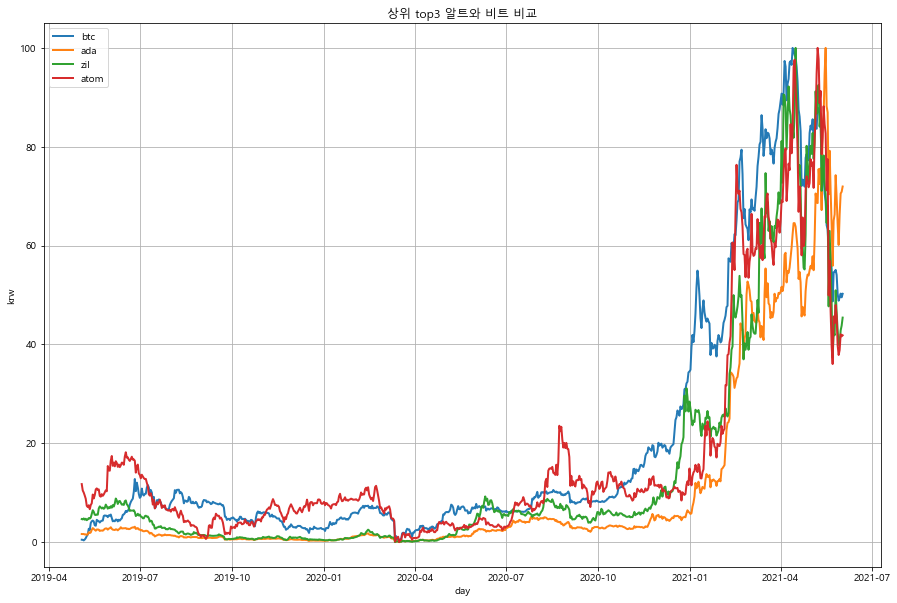

In [38]:
bit = df_scale 
plt.figure(figsize=(15, 10))
for c in bit.columns.values:
    plt.plot(bit[c], alpha = 7, lw = 2)

plt.title('상위 top3 알트와 비트 비교')
plt.xlabel('day')
plt.ylabel('krw')
plt.legend(bit.columns.values, loc='upper left')
plt.grid()
plt.show()

## ↑ 비트코일과 알트코인의 스케일을 조정하여 비교본다면 대체적으로 비트코인의 추세를 따른다는 것을 확인할 수 있다.

In [39]:
dsr = df.pct_change(1)
dsr.head()

,btc,ada,zil,atom
date,,,,
2019-05-04,NaN,NaN,NaN,NaN
2019-05-05,-0.002232,-0.005188,-0.010811,-0.072309
2019-05-06,-0.012530,0.005215,0.032787,-0.025686
2019-05-07,0.020091,-0.037613,-0.042328,-0.036364
2019-05-08,0.030505,0.013477,0.033149,-0.042453


In [40]:
dsr = dsr.set_index(pd.DatetimeIndex(dsr.index))

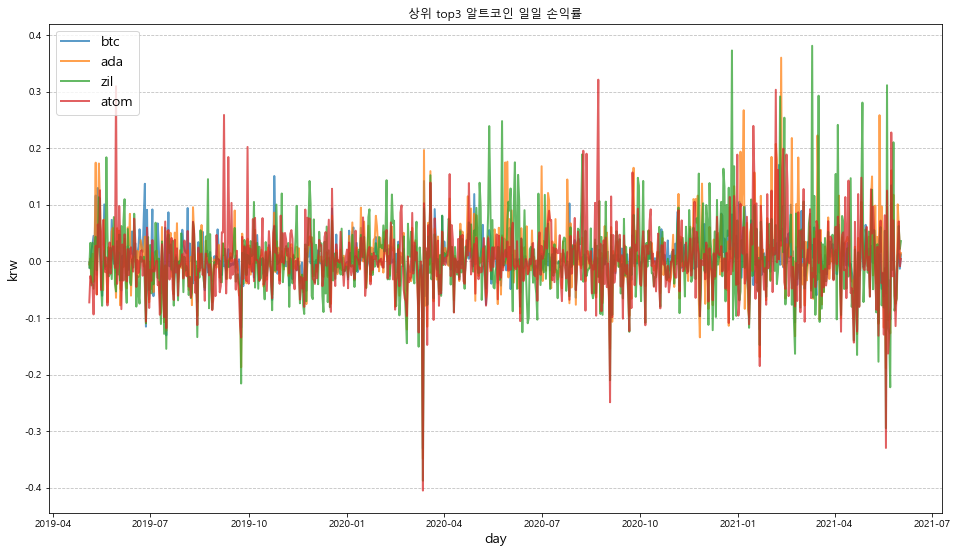

In [41]:
bit = dsr 
plt.figure(figsize=(16, 9))

plt.plot( dsr, alpha = 70, lw = 2,)

plt.title('상위 top3 알트코인 일일 손익률')
plt.xlabel('day', fontsize=14)
plt.ylabel('krw', fontsize=14)
plt.legend(bit.columns, loc='upper left',fontsize=14)
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')
plt.show()

## ↑일일 손익률을 간단하게 현재로 보자면 2020년 10월부터 상승추세를 그리다 2021년 6월부터 하락에 접어든 것을 알 수 있다. 

In [42]:
import numpy as np

dscr = 0
dscr = (dsr+1).cumprod()
dscr

dscr = dscr.set_index(pd.DatetimeIndex(dsr.index))

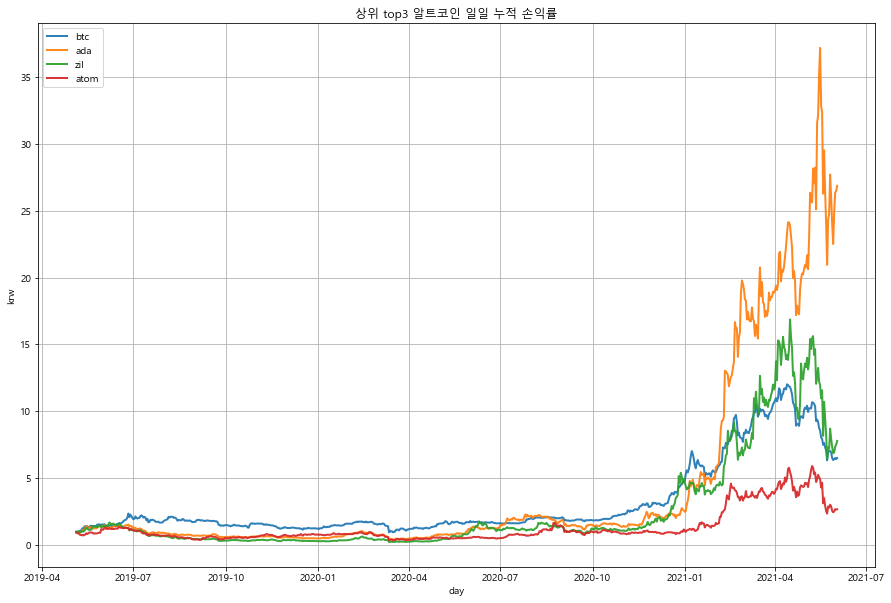

In [43]:
bit = dscr 
plt.figure(figsize=(15, 10))
for c in bit.columns.values:
    plt.plot(bit[c], alpha = 20, lw = 2)

plt.title('상위 top3 알트코인 일일 누적 손익률')
plt.xlabel('day')
plt.ylabel('krw')
plt.legend(bit.columns.values, loc='upper left')
plt.grid()
plt.show()

## ↑ 일일 누적 손익률은 2019년 중반부터 현재까지 1000원을 투자를 했다면?
* 비트코인은 최대 약 13배의 수익을 얻을 수 있고 현재 약 7배의 수익을 얻을 수 있다.  
* 에이다는 최대 약 35배의 수익을 얻을 수 있고 현재 약 26배의 수익을 얻을 수 있다.
* 질리카는 최대 약 15배의 수익을 얻을 수 있고 현재 약 8배의 수익을 얻을 수 있다.
* 코스모스는 최대 약 6배의 수익을 얻을 수 있고 현재 약 3배의 수익을 얻을 수 있다.

# 중위

In [44]:
import pandas as pd 

In [45]:
btc = pd.read_csv('../upbit/data/bitcoin.csv', encoding='utf-8')
ong = pd.read_csv('../upbit/data/4_온톨로지가스.csv', encoding= 'utf-8')
strax = pd.read_csv('../upbit/data/5_스트라티스.csv', encoding= 'utf-8')
knc = pd.read_csv('../upbit/data/6_카이버네트워크.csv', encoding= 'utf-8')

knc.head(3)

,date,open,high,low,close,volume
0,2018-10-26,500.0,607.0,500.0,526.0,2.979798e+07
1,2018-10-27,526.0,563.0,515.0,519.0,1.110737e+07
2,2018-10-28,519.0,525.0,508.0,512.0,2.266223e+06


In [46]:
btc = btc[(btc['date'] >= '2018-10-26')]
ong = ong[(ong['date'] >= '2018-10-26')]
strax = strax[(strax['date'] >= '2018-10-26')]
knc = knc[(knc['date'] >= '2018-10-26')]

btc.reset_index(drop= True, inplace=True)
ong.reset_index(drop= True, inplace=True)
strax.reset_index(drop= True, inplace=True)
knc.reset_index(drop= True, inplace=True)
btc.head(3)

,date,open,high,low,close,volume,value
0,2018-10-26,7272000.0,7309000.0,7241000.0,7276000.0,2404.521463,1.747621e+10
1,2018-10-27,7276000.0,7291000.0,7250000.0,7284000.0,1632.075504,1.187060e+10
2,2018-10-28,7284000.0,7290000.0,7241000.0,7258000.0,1367.837482,9.933433e+09


In [47]:
import pandas as pd
df = pd.concat([btc['date'],btc['close'].rename('btc'), ong['close'].rename('ong'),
                strax['close'].rename('strax'),knc['close'].rename('knc')], axis =1)

df.set_index('date', inplace = True)
df = df.drop(index=['2021-06-03'], axis=0)
df.tail()

,btc,ong,strax,knc
date,,,,
2021-05-29,42688000.0,1285.0,3060.0,1895.0
2021-05-30,43177000.0,1255.0,2970.0,1905.0
2021-05-31,43761000.0,1245.0,2955.0,1985.0
2021-06-01,43200000.0,1195.0,2895.0,2385.0
2021-06-02,43732000.0,1235.0,2900.0,2445.0


In [48]:
# 그래프
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(df)

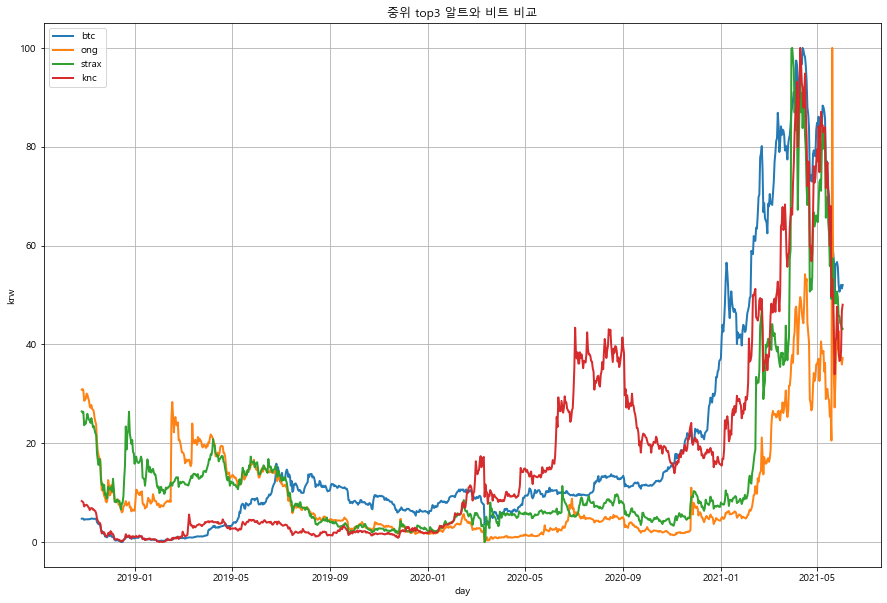

In [49]:
df_scale = pd.DataFrame(scaled, columns= df.columns)
df_scale = df_scale.set_index(pd.DatetimeIndex(df.index))

bit = df_scale 
plt.figure(figsize=(15, 10))
for c in bit.columns.values:
    plt.plot(bit[c], alpha = 7, lw = 2)

plt.title('중위 top3 알트와 비트 비교')
plt.xlabel('day')
plt.ylabel('krw')
plt.legend(bit.columns.values, loc='upper left')
plt.grid()
plt.show()

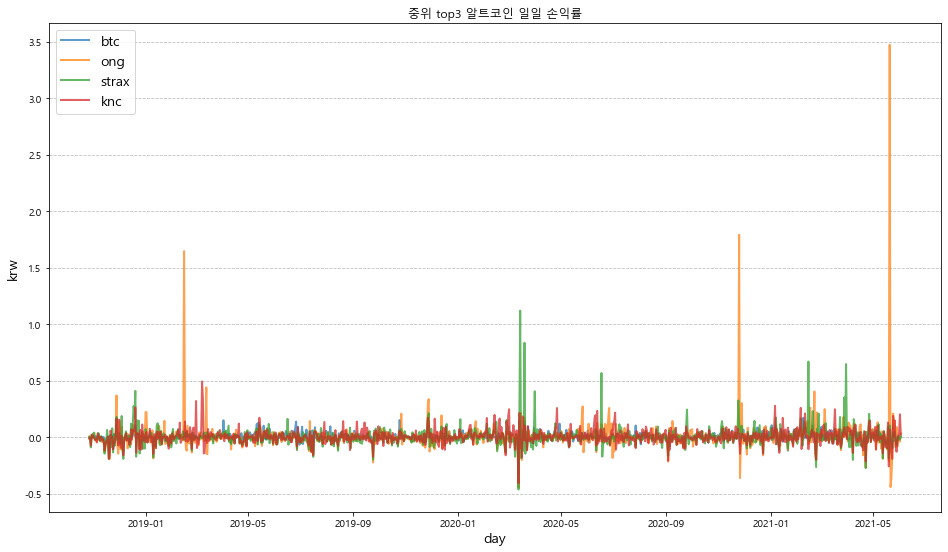

In [50]:
dsr = df.pct_change(1)
dsr = dsr.set_index(pd.DatetimeIndex(dsr.index))

bit = dsr 
plt.figure(figsize=(16, 9))

plt.plot( dsr, alpha = 70, lw = 2,)

plt.title('중위 top3 알트코인 일일 손익률')
plt.xlabel('day', fontsize=14)
plt.ylabel('krw', fontsize=14)
plt.legend(bit.columns, loc='upper left',fontsize=14)
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')
plt.show()

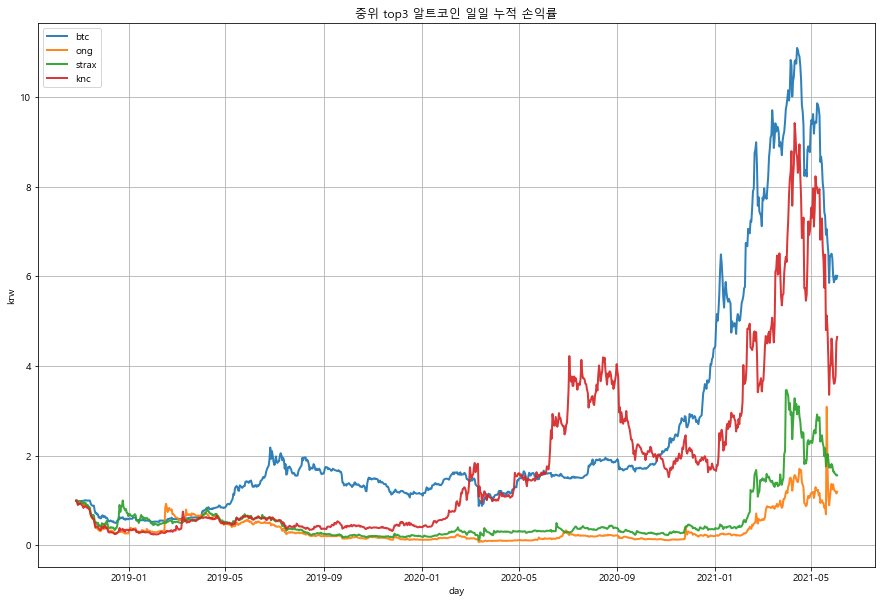

In [51]:
import numpy as np

dscr = (dsr+1).cumprod()
dscr = dscr.set_index(pd.DatetimeIndex(dsr.index))

bit = dscr 
plt.figure(figsize=(15, 10))
for c in bit.columns.values:
    plt.plot(bit[c], alpha = 20, lw = 2)

plt.title('중위 top3 알트코인 일일 누적 손익률')
plt.xlabel('day')
plt.ylabel('krw')
plt.legend(bit.columns.values, loc='upper left')
plt.grid()
plt.show()

------------------------------------------------------------------
# 하위

In [52]:
btc = pd.read_csv('../upbit/data/bitcoin.csv', encoding='utf-8')
moc = pd.read_csv('../upbit/data/7_모스코인.csv', encoding= 'utf-8')
mlk = pd.read_csv('../upbit/data/8_밀크.csv', encoding= 'utf-8')
loom = pd.read_csv('../upbit/data/9_룸네트워크.csv', encoding= 'utf-8')

mlk.head(3)

,date,open,high,low,close,volume
0,2020-02-21,1620.0,2620.0,1010.0,1230.0,5.288186e+07
1,2020-02-22,1225.0,1300.0,856.0,912.0,5.748862e+07
2,2020-02-23,913.0,995.0,860.0,918.0,4.444767e+07


In [53]:
btc = btc[(btc['date'] >= '2020-02-21')]
moc = moc[(moc['date'] >= '2020-02-21')]
mlk = mlk[(mlk['date'] >= '2020-02-21')]
loom = loom[(loom['date'] >= '2020-02-21')]

btc.reset_index(drop= True, inplace=True)
moc.reset_index(drop= True, inplace=True)
mlk.reset_index(drop= True, inplace=True)
loom.reset_index(drop= True, inplace=True)
btc.head(3)

,date,open,high,low,close,volume,value
0,2020-02-21,11532000.0,11620000.0,11454000.0,11498000.0,4249.298634,4.907744e+10
1,2020-02-22,11498000.0,11529000.0,11395000.0,11496000.0,1836.087072,2.106738e+10
2,2020-02-23,11495000.0,11831000.0,11482000.0,11753000.0,3288.459796,3.842474e+10


In [54]:
import pandas as pd
df = pd.concat([btc['date'],btc['close'].rename('btc'), moc['close'].rename('moc'),
                mlk['close'].rename('mlk'),loom['close'].rename('loom')], axis =1)

df.set_index('date', inplace = True)
df = df.drop(index=['2021-06-03'], axis=0)
df.tail()

,btc,moc,mlk,loom
date,,,,
2021-05-29,42688000.0,130.0,1565.0,94.6
2021-05-30,43177000.0,129.0,1610.0,92.3
2021-05-31,43761000.0,130.0,1655.0,92.7
2021-06-01,43200000.0,125.0,1600.0,90.9
2021-06-02,43732000.0,127.0,1600.0,90.2


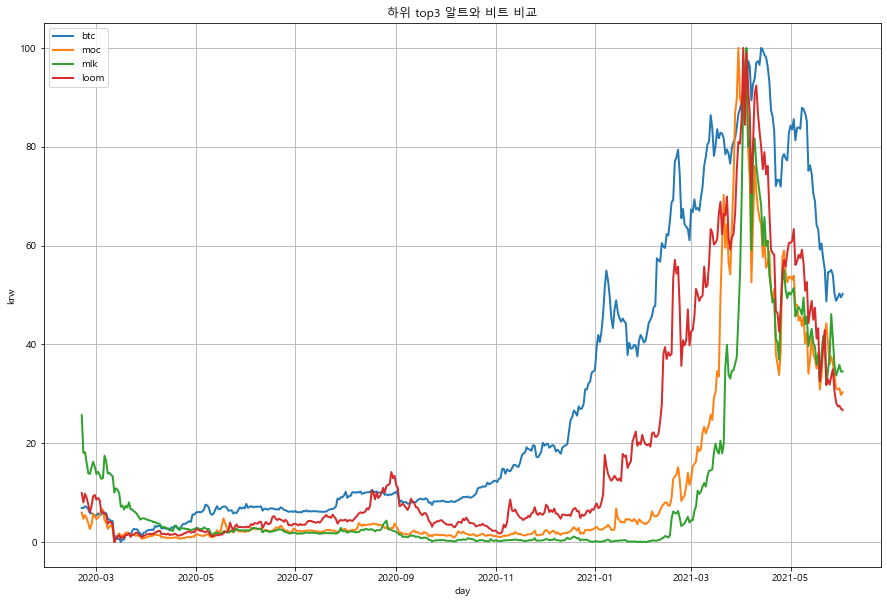

In [55]:
# 그래프
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(df)

df_scale = pd.DataFrame(scaled, columns= df.columns)
df_scale = df_scale.set_index(pd.DatetimeIndex(df.index))

bit = df_scale 
plt.figure(figsize=(15, 10))
for c in bit.columns.values:
    plt.plot(bit[c], alpha = 7, lw = 2)

plt.title('하위 top3 알트와 비트 비교')
plt.xlabel('day')
plt.ylabel('krw')
plt.legend(bit.columns.values, loc='upper left')
plt.grid()
plt.show()

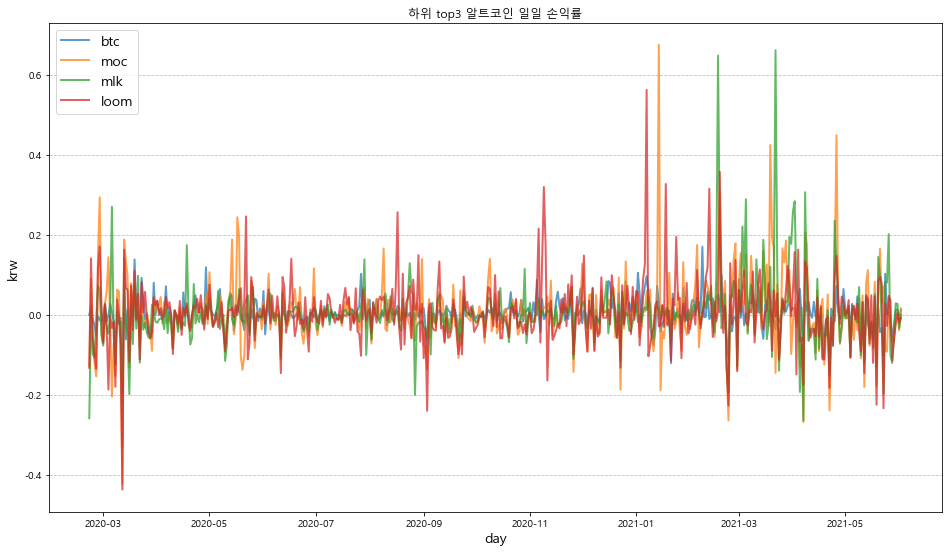

In [56]:
dsr = df.pct_change(1)
dsr = dsr.set_index(pd.DatetimeIndex(dsr.index))

bit = dsr 
plt.figure(figsize=(16, 9))

plt.plot( dsr, alpha = 70, lw = 2,)

plt.title('하위 top3 알트코인 일일 손익률')
plt.xlabel('day', fontsize=14)
plt.ylabel('krw', fontsize=14)
plt.legend(bit.columns, loc='upper left',fontsize=14)
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')
plt.show()

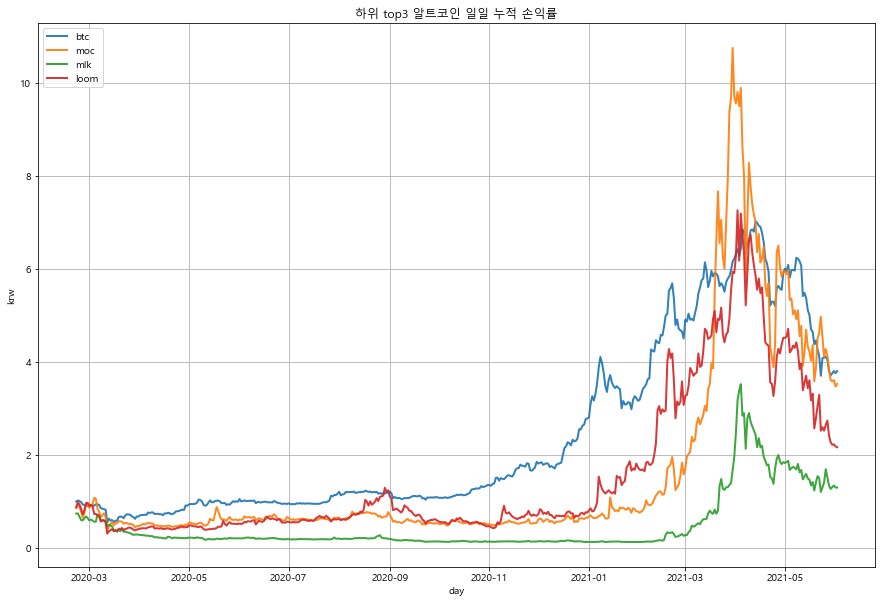

In [57]:
import numpy as np

dscr = (dsr+1).cumprod()
dscr = dscr.set_index(pd.DatetimeIndex(dsr.index))

bit = dscr 
plt.figure(figsize=(15, 10))
for c in bit.columns.values:
    plt.plot(bit[c], alpha = 20, lw = 2)

plt.title('하위 top3 알트코인 일일 누적 손익률')
plt.xlabel('day')
plt.ylabel('krw')
plt.legend(bit.columns.values, loc='upper left')
plt.grid()
plt.show()

# ARIMA

In [440]:
bit = pd.read_csv('../upbit/data/bitcoin.csv', encoding='utf-8')
bit.tail()

,date,open,high,low,close,volume,value
1343,2021-05-30,42688000.0,43827000.0,40580000.0,43177000.0,9194.807917,3.903808e+11
1344,2021-05-31,43177000.0,44235000.0,41304000.0,43761000.0,10111.066220,4.336194e+11
1345,2021-06-01,43761000.0,44550000.0,42515000.0,43200000.0,9081.150288,3.948303e+11
1346,2021-06-02,43207000.0,44341000.0,42550000.0,43732000.0,7405.760642,3.217178e+11
1347,2021-06-03,43744000.0,45301000.0,43439000.0,45242000.0,4264.597973,1.897303e+11


In [441]:
#
bit['date'] = pd.to_datetime(bit['date']).dt.normalize()
bit.index = bit['date']
bit_close = bit[['close']]
bit_close.tail()

,close
date,
2021-05-30,43177000.0
2021-05-31,43761000.0
2021-06-01,43200000.0
2021-06-02,43732000.0
2021-06-03,45242000.0


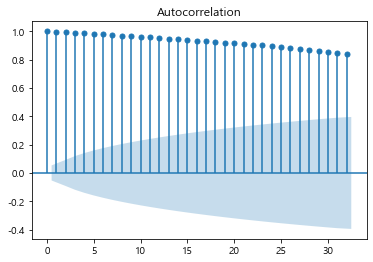

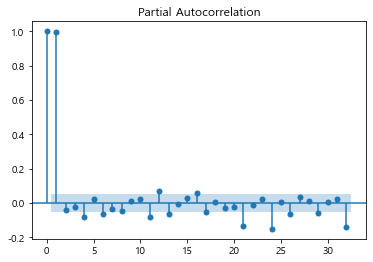

In [442]:
plot_acf(bit_close)
plot_pacf(bit_close)
plt.show()

In [443]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [444]:
model = ARIMA(bit_close.close.values, order=(1,1,1))

In [445]:
model_fit =0
model_fit = model.fit(trend='nc', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1347
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -20408.834
Method:                       css-mle   S.D. of innovations         920226.195
Date:                Fri, 04 Jun 2021   AIC                          40823.668
Time:                        18:03:56   BIC                          40839.285
Sample:                             1   HQIC                         40829.517
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      0.7705      0.083      9.295      0.000       0.608       0.933
ma.L1.D.y     -0.6902      0.093     -7.386      0.000      -0.873      -0.507
                                    Roots           

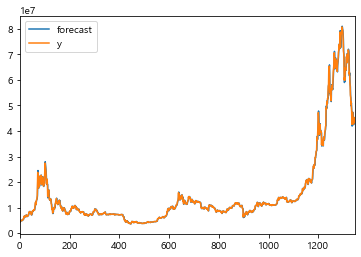

In [446]:
model_fit.plot_predict()
plt.show()

In [447]:
forecast_data = model_fit.forecast(steps=7) # 일주일 뒤 예측
pred_y = forecast_data[0].tolist()
forecast_data
pred_y

[45351962.79226824,
 45436683.96277628,
 45501957.64839481,
 45552247.95964378,
 45590994.284162655,
 45620846.50870526,
 45643846.24664706]

In [448]:
test_y = pd.read_csv('../upbit/data/bitcoin.csv', encoding='utf-8')
test_y= test_y[(test_y['date'] >= '2021-05-28')]
test_y =  test_y.close.values
test_y


array([43723000., 42688000., 43177000., 43761000., 43200000., 43732000.,
       45242000.])

In [449]:
pred_y_lower = [] 
pred_y_upper = [] 
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

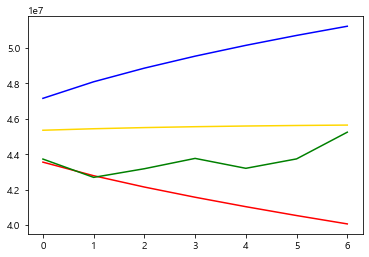

In [450]:
plt.plot(pred_y, color="gold") 
plt.plot(pred_y_lower, color="red") 
plt.plot(pred_y_upper, color="blue")
plt.plot(test_y, color="green")

In [451]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

2009579.0544243068


# prophet

In [412]:
from fbprophet import Prophet

In [413]:
bitcoin_df = pd.read_csv('../upbit/data/bitcoin.csv')
bitcoin_df = bitcoin_df[['date', 'close']]

In [414]:
bitcoin_df.rename(columns = {'date' : 'ds', 
                             'close': 'y'}, inplace = True)
bitcoin_df.to_csv('../upbit/output/비트코인_close.csv', encoding='utf-8')
bitcoin_df.head()

,ds,y
0,2017-09-25,4322000.0
1,2017-09-26,4321000.0
2,2017-09-27,4657000.0
3,2017-09-28,4586000.0
4,2017-09-29,4657000.0


In [415]:
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)

prophet.fit(bitcoin_df)

In [417]:
future_data = prophet.make_future_dataframe(periods=7, freq='d') # 7일 예측
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
1345,2021-06-01,4.154046e+07,3.958926e+07,4.359737e+07
1346,2021-06-02,4.085925e+07,3.888648e+07,4.277911e+07
1347,2021-06-03,4.023608e+07,3.817927e+07,4.225306e+07
1348,2021-06-04,3.985433e+07,3.785333e+07,4.188329e+07
1349,2021-06-05,3.952513e+07,3.753083e+07,4.167630e+07
1350,2021-06-06,3.877625e+07,3.670272e+07,4.094468e+07
1351,2021-06-07,3.874716e+07,3.655640e+07,4.079571e+07
1352,2021-06-08,3.837314e+07,3.654332e+07,4.060113e+07
1353,2021-06-09,3.810346e+07,3.611356e+07,4.023285e+07
1354,2021-06-10,3.786149e+07,3.562622e+07,3.982421e+07


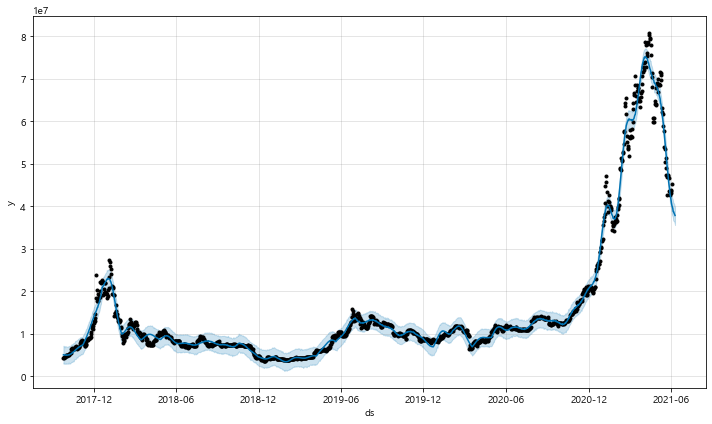

In [418]:
fig1 = prophet.plot(forecast_data)

C:\Users\Administrator\Anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\Administrator\Anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\Administrator\Anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


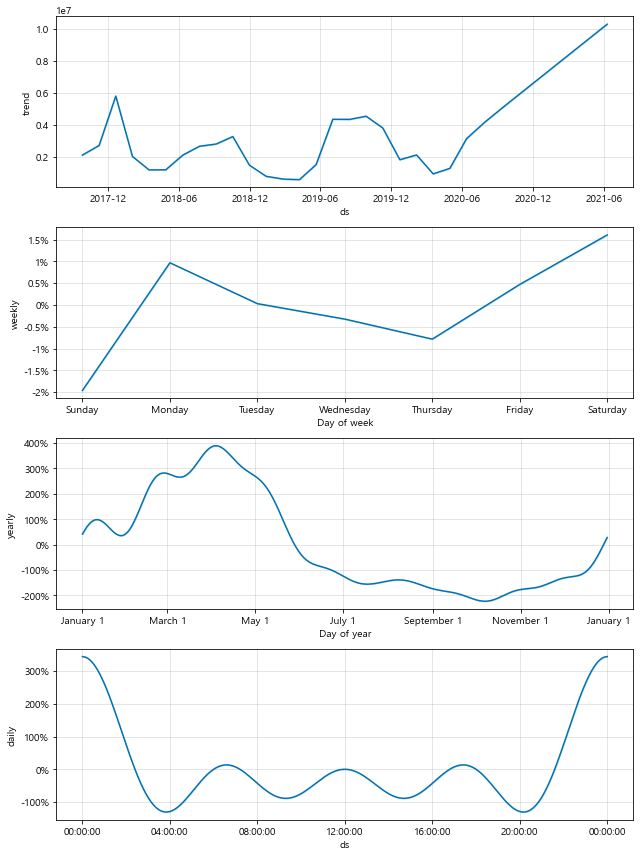

In [419]:
fig2 = prophet.plot_components(forecast_data)

# prophet의 forcasrt_data 실제 데이터와 비교

In [431]:
bitcoin_test_df = pd.read_csv('../upbit/output/비트코인_close.csv', index_col = 0)
bitcoin_test_df= bitcoin_test_df[(bitcoin_test_df['ds'] >= '2021-05-28')]

pred_y = forecast_data.yhat.values[-14:-7] # 마지막 7일의 예측 데이터입니다.
test_y = bitcoin_test_df.y.values # 실제 7일 가격 데이터입니다. (2021-05-29 ~ 2021-06-03)
pred_y_lower = forecast_data.yhat_lower.values[-14:-7] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = forecast_data.yhat_upper.values[-14:-7] 

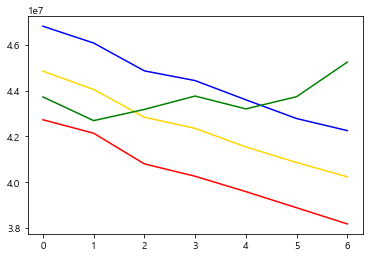

In [432]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") 

In [439]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

2428607.8650430557


# 현재 비트코인은 불안정한 시기이며. 현재의 추세는 예측이 무의하다는 결론